In [1]:
import tensorflow as tf

a = tf.Variable(3, name="a")
b = tf.Variable(25, name="b")
f = a + b

init = tf.global_variables_initializer()
with tf.Session() as s:
    init.run()
    print( f.eval() )

C:\Users\Palugudi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


28


In [7]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

sess = tf.InteractiveSession()

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

C:\Users\Palugudi\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


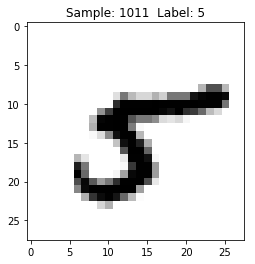

In [24]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(mnist.train.labels[num])  
    #Print the label converted back to a number
    label = mnist.train.labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = mnist.train.images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1011)

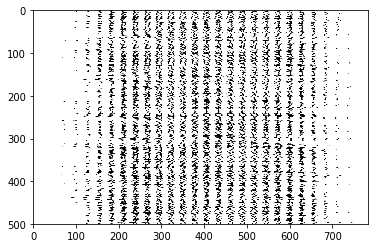

In [25]:
import numpy as np

images = mnist.train.images[0].reshape([1,784])
for i in range(1, 500): #it show first 500 traning samples
    images = np.concatenate((images, mnist.train.images[i].reshape([1,784])))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()
#this is the raw input in neural network that we are going to biuld

In [26]:
input_images = tf.placeholder(tf.float32, shape=[None, 784])
target_labels = tf.placeholder(tf.float32, shape=[None, 10])

In [32]:
#setup a tropology of our neural network
#here we are creating variables to hold the numbers (memory) between each training run
#so these are maintaining the atual weigths and bias terms within our neural networkd from run to run
hidden_nodes = 512

#creating a layer with 784 inputs and 512 outputs(which are going to be inputs to next layer) i.e 1 input for each image pixel and having 512 nodes to next level 
input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
#bias term between input layer and hidden layer
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))

In [33]:
#here we are defining the connections, def layers themselves
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases

In [35]:
#measuring the correctness of our results by using softmax
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels=target_labels))


In [36]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [37]:
#measures the accuracy of our neural network
#Measuring accuracy by taking mean of all those correct prediction results over all the test data that we measured
correct_prediction = tf.equal(tf.argmax(digit_weights,1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [57]:
tf.global_variables_initializer().run()

for x in range(10000): #we are going to execute following block 2000 times
    batch = mnist.train.next_batch(100)#pick out the next 100 trainig images from our batch of traning images
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]}) #matches placeholder to actual data
    if ((x+1) % 100 == 0):
        print("Training epoch " + str(x+1))
        print("Accuracy: " + str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels: mnist.test.labels})))

Training epoch 100
Accuracy: 0.8491
Training epoch 200
Accuracy: 0.8771
Training epoch 300
Accuracy: 0.8811
Training epoch 400
Accuracy: 0.8879
Training epoch 500
Accuracy: 0.8908
Training epoch 600
Accuracy: 0.9002
Training epoch 700
Accuracy: 0.8996
Training epoch 800
Accuracy: 0.9077
Training epoch 900
Accuracy: 0.914
Training epoch 1000
Accuracy: 0.9168
Training epoch 1100
Accuracy: 0.9153
Training epoch 1200
Accuracy: 0.9147
Training epoch 1300
Accuracy: 0.9204
Training epoch 1400
Accuracy: 0.924
Training epoch 1500
Accuracy: 0.9207
Training epoch 1600
Accuracy: 0.9244
Training epoch 1700
Accuracy: 0.921
Training epoch 1800
Accuracy: 0.9272
Training epoch 1900
Accuracy: 0.9263
Training epoch 2000
Accuracy: 0.9284
Training epoch 2100
Accuracy: 0.9301
Training epoch 2200
Accuracy: 0.9286
Training epoch 2300
Accuracy: 0.9329
Training epoch 2400
Accuracy: 0.9329
Training epoch 2500
Accuracy: 0.932
Training epoch 2600
Accuracy: 0.9318
Training epoch 2700
Accuracy: 0.9325
Training epoch

### 92% of accuracy in correctly predecting bunch of images in our data set

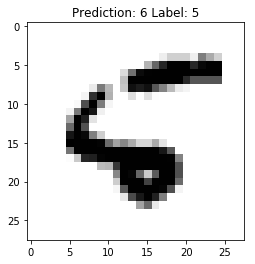

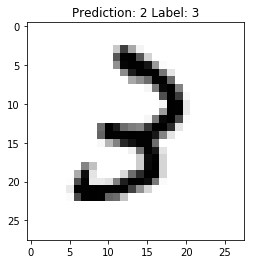

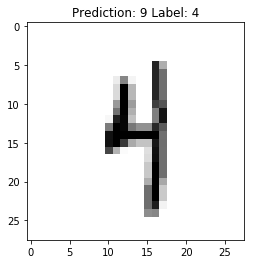

In [58]:
#test data
for x in range(100):
    # Load a single test image and its label
    x_train = mnist.test.images[x,:].reshape(1,784)
    y_train = mnist.test.labels[x,:]
    # Convert the one-hot label to an integer
    label = y_train.argmax()
    # Get the classification from our neural network's digit_weights final layer, and convert it to an integer
    prediction = sess.run(digit_weights, feed_dict={input_images: x_train}).argmax()
    # If the prediction does not match the correct label, display it
    if (prediction != label) :
        plt.title('Prediction: %d Label: %d' % (prediction, label))
        plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

# another testing for better accuracy 

In [107]:
input_images = tf.placeholder(tf.float32, shape=[None, 784])
target_labels = tf.placeholder(tf.float32, shape=[None, 10])

In [114]:
#setup a tropology of our neural network
#here we are creating variables to hold the numbers (memory) between each training run
#so these are maintaining the atual weigths and bias terms within our neural networkd from run to run
hidden_nodes = 812

#creating a layer with 784 inputs and 512 outputs(which are going to be inputs to next layer) i.e 1 input for each image pixel and having 512 nodes to next level 
input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
#bias term between input layer and hidden layer
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))

In [115]:
#here we are defining the connections, def layers themselves
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases

In [116]:
#measuring the correctness of our results by using softmax
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels=target_labels))


In [117]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [118]:
#measures the accuracy of our neural network
#Measuring accuracy by taking mean of all those correct prediction results over all the test data that we measured
correct_prediction = tf.equal(tf.argmax(digit_weights,1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [120]:
tf.global_variables_initializer().run()

for x in range(4000): #we are going to execute following block 2000 times
    batch = mnist.train.next_batch(550)#pick out the next 100 trainig images from our batch of traning images
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]}) #matches placeholder to actual data
    if ((x+1) % 550 == 0):
        print("Training epoch " + str(x+1))
        print("Accuracy: " + str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels: mnist.test.labels})))

Training epoch 550
Accuracy: 0.919
Training epoch 1100
Accuracy: 0.9244
Training epoch 1650
Accuracy: 0.9269
Training epoch 2200
Accuracy: 0.9305
Training epoch 2750
Accuracy: 0.9329
Training epoch 3300
Accuracy: 0.9333
Training epoch 3850
Accuracy: 0.9335


### to have the best accuracy increase next batch size and increase  hidden nodes

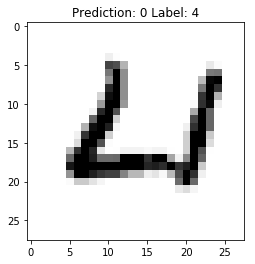

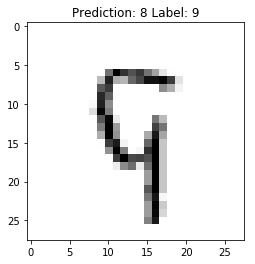

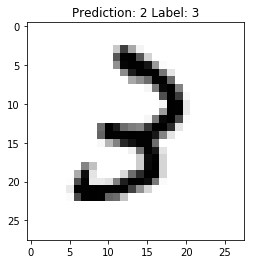

In [121]:
#test data
for x in range(100):
    # Load a single test image and its label
    x_train = mnist.test.images[x,:].reshape(1,784)
    y_train = mnist.test.labels[x,:]
    # Convert the one-hot label to an integer
    label = y_train.argmax()
    # Get the classification from our neural network's digit_weights final layer, and convert it to an integer
    prediction = sess.run(digit_weights, feed_dict={input_images: x_train}).argmax()
    # If the prediction does not match the correct label, display it
    if (prediction != label) :
        plt.title('Prediction: %d Label: %d' % (prediction, label))
        plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()